# Task03 布局格式定方圆

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

## 1 知识梳理

### 1.1 均匀子图

- 使用plt.subplots
  1. 返回元素：画布figure，子图axes列表
  2. 常用参数：
      - 第1,2个参数：行列个数
      - figsize：指定整个画布的大小
      - sharex：共享横轴刻度
      - sharey：共享纵轴刻度
      - projection：`polar`表示极坐标
  3. 方法：
      - tight_layout：调整子图的相对大小，使字符不会重复

### 1.2 非均匀子图

- 含义：
  1. 图的比例大小不同，但没有跨行或跨列
  2. 图为跨行或跨列状态
- 使用add_gridspec
  1. 常用参数：
      - width_ratios：相对宽度比例
      - height_ratios：相对高度比例

### 1.3 子图上的方法

- plot：绘制折线
- hist：绘制直方图
- axhline：绘制水平直线
- axvline：绘制垂直直线
- axline：绘制任意方向直线
- set_xscale：设置横坐标轴的规度（指对数坐标等）
- set_title：设置标题
- set_xlabel：设置轴名

- legend：绘制图例
- annotate：绘制注释
- arrow：绘制带箭头的直线
- text：绘制文字

- 图例的 `loc` 参数如下：

|  string   | code  |
|  ----  | ----  |
| best  | 0 |
| upper right  | 1 |
| upper left  | 2 |
| lower left  | 3 |
| lower right  | 4 |
| right  | 5 |
| center left  | 6 |
| center right  | 7 |
| lower center  | 8 |
| upper center  | 9 |
| center  | 10 |

## 2 实战练习

### 2.1 绘制均匀子图

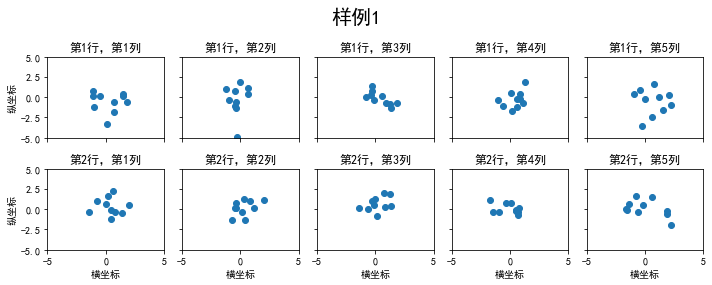

In [2]:
# 创建2行5列的均匀子图
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
# 创建标题
fig.suptitle('样例1', size=20)

for i in range(2):
    for j in range(5):
        # 绘制散点图
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title(f'第{i+1}行，第{j+1}列')
        axs[i][j].set_xlim(-5, 5)
        axs[i][j].set_ylim(-5, 5)
        if i == 1:
            axs[i][j].set_xlabel('横坐标')
        if j == 0:
            axs[i][j].set_ylabel('纵坐标')

# 自动调整子图的相对大小
fig.tight_layout()

### 2.2 绘制非均匀子图

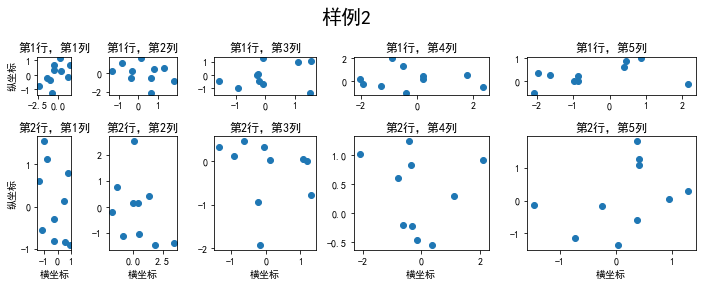

In [3]:
fig = plt.figure(figsize=(10, 4))
# 创建非均匀子图列，相对宽度比例是1:2:3:4:5，相对高度比例是1:3
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[
                        1, 2, 3, 4, 5], height_ratios=[1, 3])
# 创建标题
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        # 添加子图
        ax = fig.add_subplot(spec[i, j])
        # 绘制散点图
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title(f'第{i+1}行，第{j+1}列')
        if i == 1:
            ax.set_xlabel('横坐标')
        if j == 0:
            ax.set_ylabel('纵坐标')

# 自动调整子图的相对大小
fig.tight_layout()

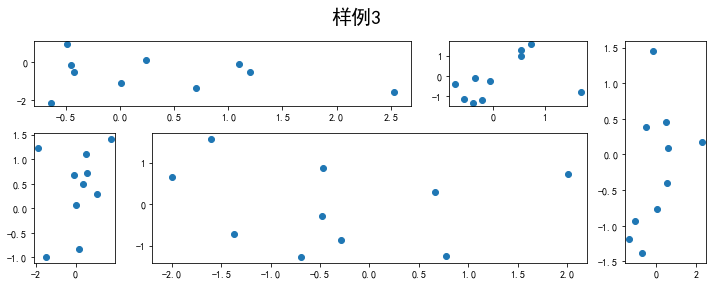

In [4]:
fig = plt.figure(figsize=(10, 4))
# 创建非均匀子图列2行6列，相对宽度比例是2:2.5:3:1:1.5:2，相对高度比例是1:2
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[
                        2, 2.5, 3, 1, 1.5, 2], height_ratios=[1, 2])
fig.suptitle('样例3', size=20)
# 跨列sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# 跨列sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# 跨行sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# 跨列sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))

# 自动调整子图的相对大小
fig.tight_layout()

### 2.3 绘制各种对象

Text(0.8, 0.2, '这是中点')

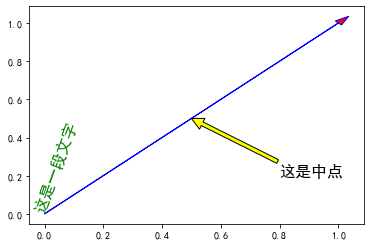

In [5]:
# 创建figure，axes
fig, ax = plt.subplots()
# 绘制带箭头的直线：起点(0,0)，终点(1,1)，箭头宽度0.03，长度0.05，外框颜色blue，内部颜色red
ax.arrow(0, 0, 1, 1, head_width=0.03, head_length=0.05,
         facecolor='red', edgecolor='blue')
# 绘制文字：起点(0,0)，字体16，角度70，文字颜色green
ax.text(x=0, y=0, s='这是一段文字', fontsize=16, rotation=70,
        rotation_mode='anchor', color='green')
# 绘制注释：注释位置(0.5,0.5)，文字位置(0.8,0.2)，箭头颜色yellow，外框颜色black，字体16
ax.annotate('这是中点', xy=(0.5, 0.5), xytext=(0.8, 0.2), arrowprops=dict(
    facecolor='yellow', edgecolor='black'), fontsize=16)

## 3 课后习题

### 3.1 习题1

墨尔本1981年至1990年的每月温度情况

In [6]:
ex1 = pd.read_csv('../data/layout_ex1.csv')
ex1.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


请利用数据，画出如下的图：

<img src="https://s1.ax1x.com/2020/11/01/BwvCse.png" width="800" align="bottom" />

**解答：**

In [7]:
# 将Time列进行拆分，分成year和month两列
new_cols = ex1['Time'].str.split('-', expand=True).rename(columns={0:'year', 1:'month'})
# 将数据进行整合
ex1 = pd.concat([ex1.drop(columns=['Time']), new_cols], 1)
# 修改year和month的数据类型
ex1.month = ex1.month.astype('int').astype('str')
ex1.head()

,Temperature,year,month
0,17.712903,1981,1
1,17.678571,1981,2
2,13.500000,1981,3
3,12.356667,1981,4
4,9.490323,1981,5


In [8]:
years = ex1['year'].unique().tolist()
months = ex1['month'].unique()

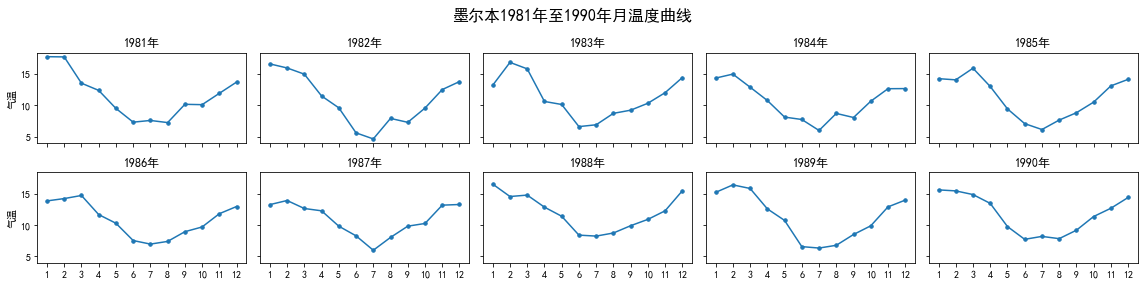

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(16, 4), sharex=True, sharey=True)
fig.suptitle('墨尔本1981年至1990年月温度曲线', size=16)
year_index = 0
for i in range(2):
    for j in range(5):
        year = str(years[year_index])
        year_index += 1
        axs[i][j].plot(months, ex1.loc[ex1.year==year]['Temperature'])
        axs[i][j].scatter(months, ex1.loc[ex1.year==year]['Temperature'], s=12)
        axs[i][j].set_title(f'{year}年')
        if j==0: axs[i][j].set_ylabel('气温')
        
fig.tight_layout()

### 3.2 习题2

画出数据的散点图和边际分布，使用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

<img src="https://s1.ax1x.com/2020/11/01/B0pEnS.png" width="400" height="400" align="bottom" />

**解答：**

**方法1：**使用`add_gridspec`方式

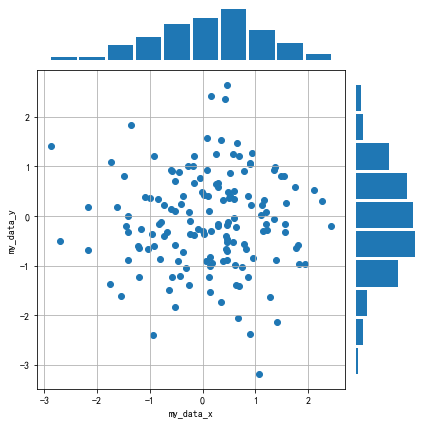

In [10]:
data = np.random.randn(2, 150)
np.random.seed(15)

fig = plt.figure(figsize=(6, 6))

# 创建非均匀子图2行2列，相对宽度比例是5:1，相对高度比例是1:6
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[5, 1] ,height_ratios=[1,6])

for i in range(2):
    for j in range(2):
        if i == j:
            ax = fig.add_subplot(spec[i, j], frame_on=False, xticks=[], yticks=[])
            if i == 0:
                ax.hist(data[0], bins=10, rwidth=0.9)
            elif i == 1:
                ax.hist(data[1], bins=10, orientation = 'horizontal',rwidth=0.9)
        elif i == 1 and j == 0:
            ax = fig.add_subplot(spec[i, j], xlabel='my_data_x', ylabel='my_data_y')
            ax.scatter(data[0], data[1])
            ax.grid(True)

# 自动调整子图的相对大小
fig.tight_layout()

**方法2：**通过切片实现子图

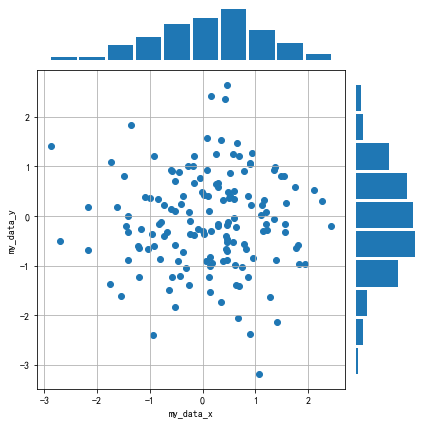

In [11]:
fig = plt.figure(figsize=(6, 6))
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[5, 1] ,height_ratios=[1,6])

# 绘制data_x的边际分布图
ax = fig.add_subplot(spec[0, 0], frame_on=False, xticks=[], yticks=[])
ax.hist(data[0], bins=10, rwidth=0.9)

# 绘制散点图
ax = fig.add_subplot(spec[1, 0], xlabel='my_data_x', ylabel='my_data_y')
ax.scatter(data[0], data[1])
ax.grid(True)

# 绘制data_y的边际分布图
ax = fig.add_subplot(spec[1, 1], frame_on=False, xticks=[], yticks=[])
ax.hist(data[1], bins=10, orientation = 'horizontal',rwidth=0.9)

fig.tight_layout()

## 4 总结

&emsp;&emsp;本次任务，主要介绍了绘制均匀子图和非均匀子图，并讲解了Axes对象的图形绘制函数，通过习题，熟悉了子图、散点图和直方图的绘制。